Dataset shape: (150, 4)
Number of classes: 3
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Class names: ['setosa' 'versicolor' 'virginica']

Training set size: (105, 4)
Test set size: (45, 4)

Model training completed!

Model Accuracy: 1.0000 (100.00%)


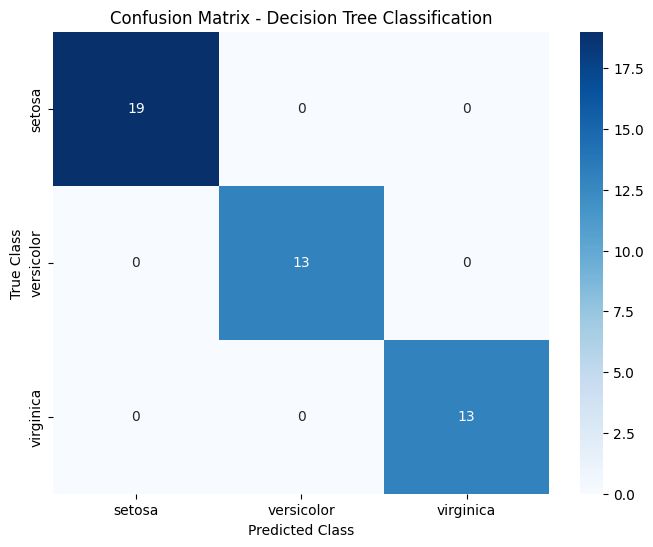


Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# a) Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

print("Dataset shape:", X.shape)
print("Number of classes:", len(np.unique(y)))
print("Feature names:", iris.feature_names)
print("Class names:", iris.target_names)

# b) Split data into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nTraining set size:", X_train.shape)
print("Test set size:", X_test.shape)

# c) Train the model using DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

print("\nModel training completed!")

# d) Make predictions on test data and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nModel Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# e) Show classification performance with confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.title('Confusion Matrix - Decision Tree Classification')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Detailed classification report
from sklearn.metrics import classification_report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Dataset shape: (20640, 8)
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Target variable statistics:
Mean house price: $206855.82
Min house price: $14999.00
Max house price: $500001.00

Training set size: (16512, 8)
Test set size: (4128, 8)

Model training completed!

Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456
R2 Score: 0.5758


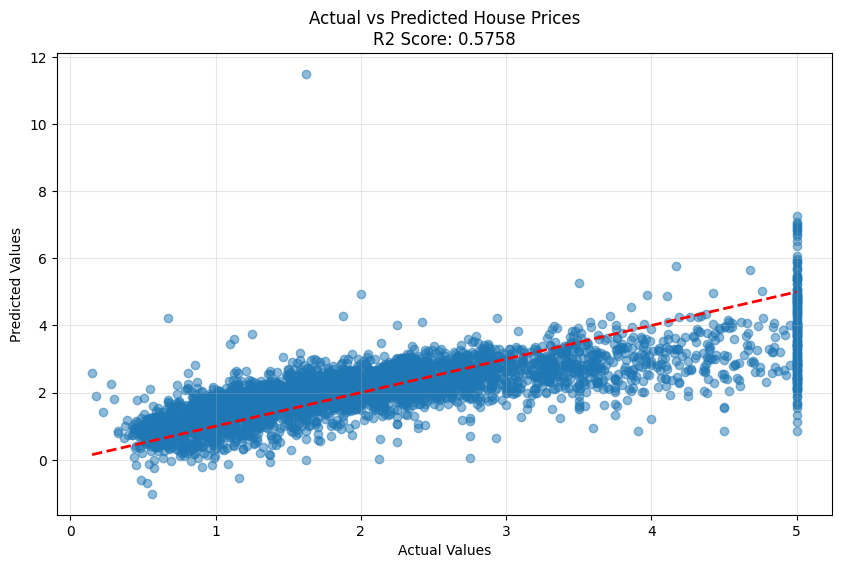

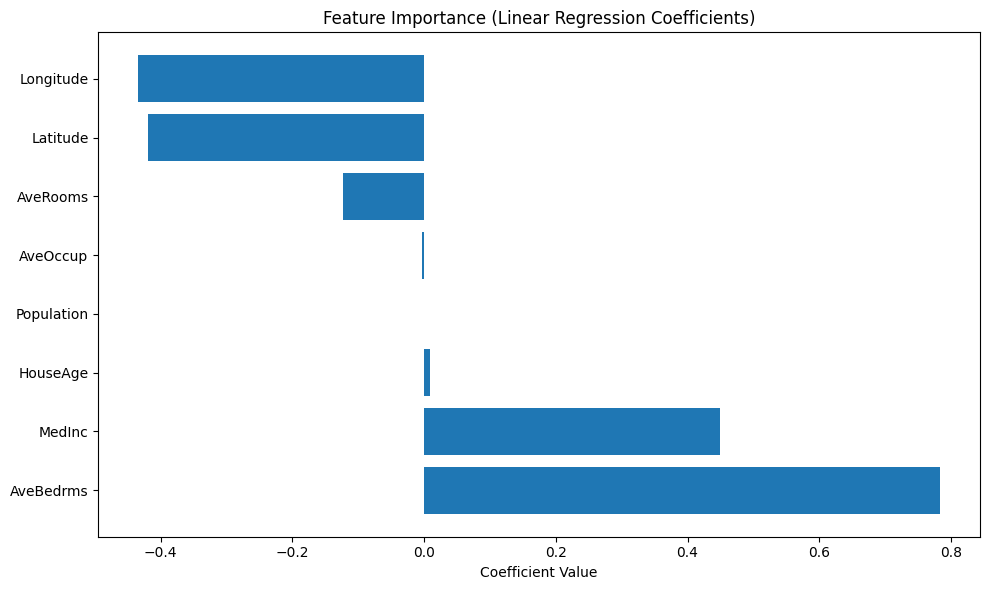


Feature Coefficients:
      feature  coefficient
3   AveBedrms     0.783145
0      MedInc     0.448675
1    HouseAge     0.009724
4  Population    -0.000002
5    AveOccup    -0.003526
2    AveRooms    -0.123323
6    Latitude    -0.419792
7   Longitude    -0.433708


In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# a) Load California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

print("Dataset shape:", X.shape)
print("Feature names:", housing.feature_names)
print("\nTarget variable statistics:")
print(f"Mean house price: ${y.mean()*100000:.2f}")
print(f"Min house price: ${y.min()*100000:.2f}")
print(f"Max house price: ${y.max()*100000:.2f}")

# b) Split data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set size:", X_train.shape)
print("Test set size:", X_test.shape)

# c) Create and train LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel training completed!")

# d) Make predictions on test data and calculate MSE
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# e) Evaluate model performance with R2 Score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.4f}")

# Visualize prediction results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted House Prices\nR2 Score: {r2:.4f}')
plt.grid(True, alpha=0.3)
plt.show()

# Visualize feature importance
feature_importance = pd.DataFrame({
    'feature': housing.feature_names,
    'coefficient': model.coef_
}).sort_values('coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.tight_layout()
plt.show()

print("\nFeature Coefficients:")
print(feature_importance)

  End of the notebook.